This notebook just shows the results of the sensitivity analysis.

In [1]:
import numpy as np
import pandas as pd
from os.path import join as opj
from glob import glob
import re
import matplotlib.pylab as plt
import seaborn as sns
import sys
sys.path.append("..")

from src.metrics import *
from src.utils import *

In [2]:
# Algorithm: RIDGE
algorithm = "ridge"
r2_med_df = []
for m_var in ["sbp_reactivity_both", "sbp_auc_g_both", "sbp_auc_i_both"]:
    predictions_dir = opj("..", "results",
                          f"Y-mavg_bulbf_ccaf_M-{m_var}_task-both",
                          f"sensitivity_analysis/{algorithm}")

    list_preds_df = []
    cases = glob(opj(predictions_dir, "model*.npz"))
    for case in cases:
        model = re.findall(opj(predictions_dir, 'model_(.*).npz'), case)[0]
        res_file = opj(predictions_dir, f"model_{model}.npz")

        res_pred_df = get_results(res_file)
        res_pred_df['model'] = model
        list_preds_df.append(res_pred_df)

    list_preds_df = pd.concat(list_preds_df)
    r2_df = generate_res_df(list_preds_df)[-1]
    r2_df['mediator'] = m_var
    
    r2_med_df.append(r2_df)

r2_med_df = pd.concat(r2_med_df, axis=0)
r2_med_df = pd.melt(r2_med_df, id_vars=["seed", "mediator"], value_name='R2', var_name="model")
r2_med_df = r2_med_df.replace({'sbp_reactivity_both':r'$\Delta$' + 'SBP', 
                               'sbp_auc_g_both':r'${\rm AUC}_{\rm g}$',
                               'sbp_auc_i_both':r'${\rm AUC}_{\rm i}$'})

#print(r2_med_df.groupby(["model", "mediator"])[['R2']].agg([np.mean, np.std]).round(3))

r2_med_group = r2_med_df.groupby(["model", "mediator"])[['R2']].agg(['mean', 'std', 'sem'])

ci95_hi = []
ci95_lo = []
for i in r2_med_group.index:
    m, std, sem = r2_med_group.loc[i]
    ci95_hi.append(m + 1.96*sem)
    ci95_lo.append(m - 1.96*sem)

r2_med_group['ci95_lo'] = ci95_lo
r2_med_group['ci95_hi'] = ci95_hi

r2_med_group.round(3)

R2               ci95_lo ci95_hi
                            mean    std    sem                
model mediator                                                
med   $\Delta$SBP          0.007  0.001  0.001   0.005   0.008
      ${\rm AUC}_{\rm g}$  0.077  0.001  0.001   0.075   0.078
      ${\rm AUC}_{\rm i}$  0.008  0.001  0.001   0.007   0.009
my    $\Delta$SBP          0.013  0.001  0.001   0.011   0.014
      ${\rm AUC}_{\rm g}$  0.129  0.001  0.000   0.128   0.130
      ${\rm AUC}_{\rm i}$  0.013  0.001  0.000   0.012   0.014
xm    $\Delta$SBP          0.043  0.013  0.006   0.032   0.054
      ${\rm AUC}_{\rm g}$  0.033  0.005  0.002   0.029   0.037
      ${\rm AUC}_{\rm i}$  0.026  0.008  0.004   0.019   0.033
xmy   $\Delta$SBP          0.029  0.003  0.001   0.026   0.032
      ${\rm AUC}_{\rm g}$  0.078  0.009  0.004   0.070   0.086
      ${\rm AUC}_{\rm i}$  0.025  0.004  0.002   0.022   0.029
xy    $\Delta$SBP          0.023  0.003  0.001   0.021   0.026
      ${\rm AUC}_{\rm g}$  0.026  0.008  0.004   0.018   0.033
      ${\rm AUC}_{\rm i}$  0.020  0.004  0.002   0.017   0.024

/home/javi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/javi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/javi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/javi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) inst

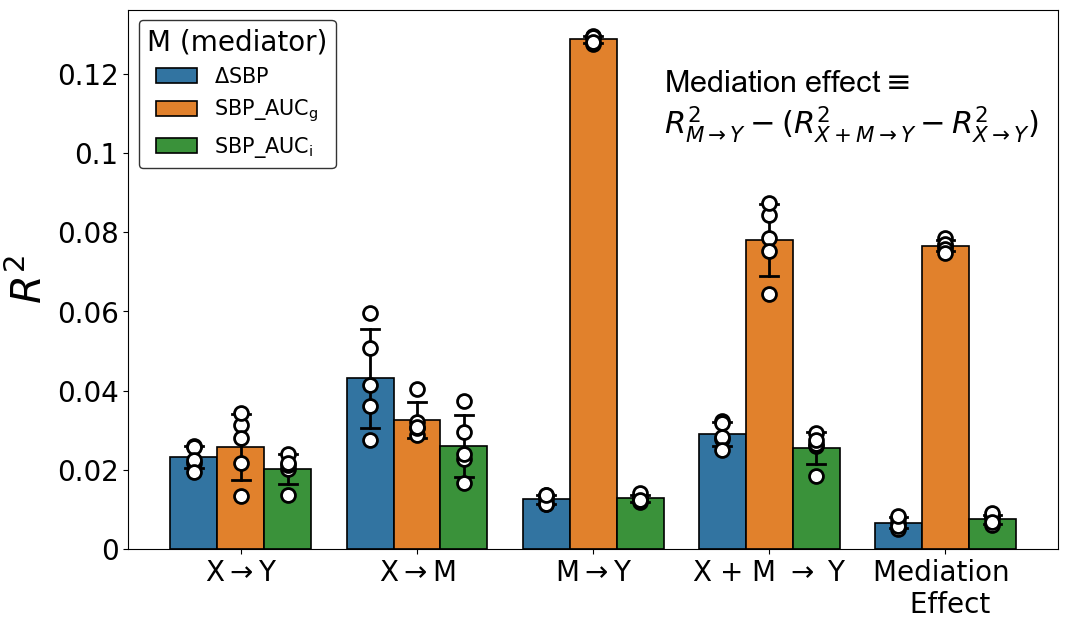

In [3]:
# Algorithm: RIDGE
algorithm = "ridge"
r2_med_df = []
for m_var in ["sbp_reactivity_both", "sbp_auc_g_both", "sbp_auc_i_both"]:
    predictions_dir = opj("..", "results",
                          f"Y-mavg_bulbf_ccaf_M-{m_var}_task-both",
                          f"sensitivity_analysis/{algorithm}")

    list_preds_df = []
    cases = glob(opj(predictions_dir, "model*.npz"))
    for case in cases:
        model = re.findall(opj(predictions_dir, 'model_(.*).npz'), case)[0]
        res_file = opj(predictions_dir, f"model_{model}.npz")

        res_pred_df = get_results(res_file)
        res_pred_df['model'] = model
        list_preds_df.append(res_pred_df)

    list_preds_df = pd.concat(list_preds_df)
    r2_df = generate_res_df(list_preds_df)[-1]
    r2_df['mediator'] = m_var
    
    r2_med_df.append(r2_df)

r2_med_df = pd.concat(r2_med_df, axis=0)
r2_med_df = pd.melt(r2_med_df, id_vars=["seed", "mediator"], value_name='R2', var_name="model")
r2_med_df = r2_med_df.replace({'sbp_reactivity_both':r'$\Delta$' + 'SBP', 
                               'sbp_auc_g_both': 'SBP_' + r'${\rm AUC}_{\rm g}$',
                               'sbp_auc_i_both': 'SBP_' + r'${\rm AUC}_{\rm i}$'})


fig, ax =  plt.subplots(figsize=(12,7))
sns.barplot(x="model", y="R2", hue="mediator", data=r2_med_df,  edgecolor='k',
            seed=1234, ax=ax,
            errorbar="sd", errcolor="k", errwidth=2, capsize=0.1,
            linewidth=1.2, zorder=1)

#ic_model = {'xy': 0, 'xm': 3, 'my': 6, 'xmy':9, 'med':12} 
ic_mediator = {r'$\Delta$' + 'SBP': 0, 'SBP_' + r'${\rm AUC}_{\rm g}$': 5, 'SBP_' + r'${\rm AUC}_{\rm i}$': 10}

r2_med_grouped_df = r2_med_df.groupby(["model", "mediator"])


for mediator in ic_mediator.keys():
    for ii, model in enumerate(['xy', 'xm', 'my', 'xmy', 'med']):
        ix_path =  ic_mediator[mediator] + ii
        x = ax.patches[ix_path].get_x() + ax.patches[ix_path].get_width()/2
        x = np.array(5*[x]) 
        y = r2_med_grouped_df.get_group((model, mediator))['R2']

        ax.scatter(x=x, y=y, c='white', s=100, zorder=3, edgecolor='k', linewidth=2)
        
ax.set_xlabel("")
ax.set_ylabel(r"$R^2$", size=30)
ax.set_xticklabels([r"X$\rightarrow$Y", 
                    r"X$\rightarrow$M", 
                    r"M$\rightarrow$Y", 
                    r"X + M $\rightarrow$ Y", "Mediation \n Effect"], rotation=0)
ax.set_yticks([0, 0.02, 0.04, 0.06,0.08, 0.1, 0.12])
ax.set_yticklabels(["0", "0.02", "0.04", "0.06","0.08", "0.1", "0.12"])

ax.tick_params(labelsize=20)

ax.legend(fontsize=15, title="M (mediator)", title_fontsize=20, loc=2, edgecolor='k')
#ax.legend()
ax.text(x=2.4, y=0.105, 
        s = 'Mediation effect' + r'$\equiv$' + "\n" + r'$R^2_{M\rightarrow Y} - (R^2_{X+M\rightarrow Y} - R^2_{X\rightarrow Y})$',
        fontfamily="Arial",
        fontsize=22)
pass
#plt.savefig(f"../plots/sup_fig_performances_{algorithm}_sensitivity.svg", dpi=300)
#plt.savefig(f"../plots/sup_performances_boxes_{algorithm}_sensitivity.png", dpi=300)